In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure

plt.rcParams["figure.figsize"] = (12,8)
%matplotlib inline

In [3]:
### Read in the data

df = pd.read_csv(r'C:\Users\USER\Desktop\SQL and Excel Files\Excel files\movies.csv')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
### Checking for missing values

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
### Replacing missing values of columns

df['budget'] = df['budget'].fillna(0)

df['gross'] = df['gross'].fillna(0)

df['score'] = df['score'].fillna(0)

df['votes'] = df['votes'].fillna(0)

df['runtime'] = df['runtime'].fillna(0)

In [6]:
### Checking data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
df['released'] = df['released'].str.replace(r"\(.*\)","", regex = True)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [8]:
### Change data types of columns

df['budget'] = df['budget'].astype(np.int64)

df['gross'] = df['gross'].astype(np.int64)

df['score'] = df['score'].astype(np.int64)

df['votes'] = df['votes'].astype(np.int64)

df['runtime'] = df['runtime'].astype(np.int64)

In [9]:
pd.set_option('display.max_rows', None)

df = df.sort_values(by = ['gross'], inplace = False, ascending = False)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009",7,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019",8,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997",7,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015",7,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018",8,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149


In [10]:
### Checking for any duplicates in our dataset

df[df.duplicated()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


### Correlations

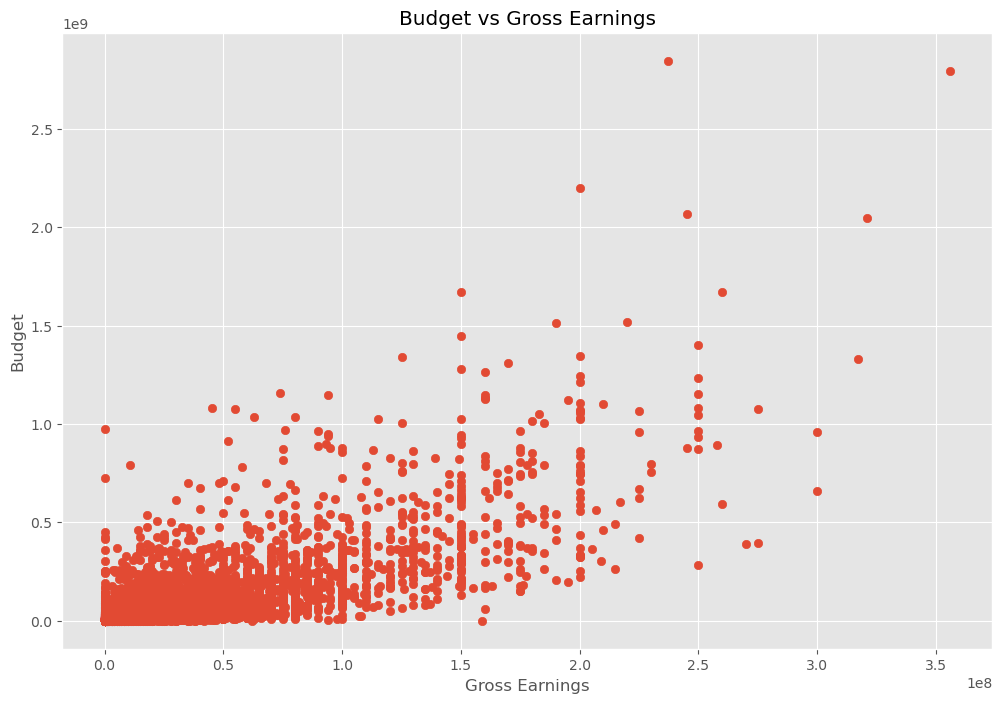

In [11]:
### Scatter plot with budget vs gross

plt.scatter(x = df['budget'], y = df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')

plt.show()

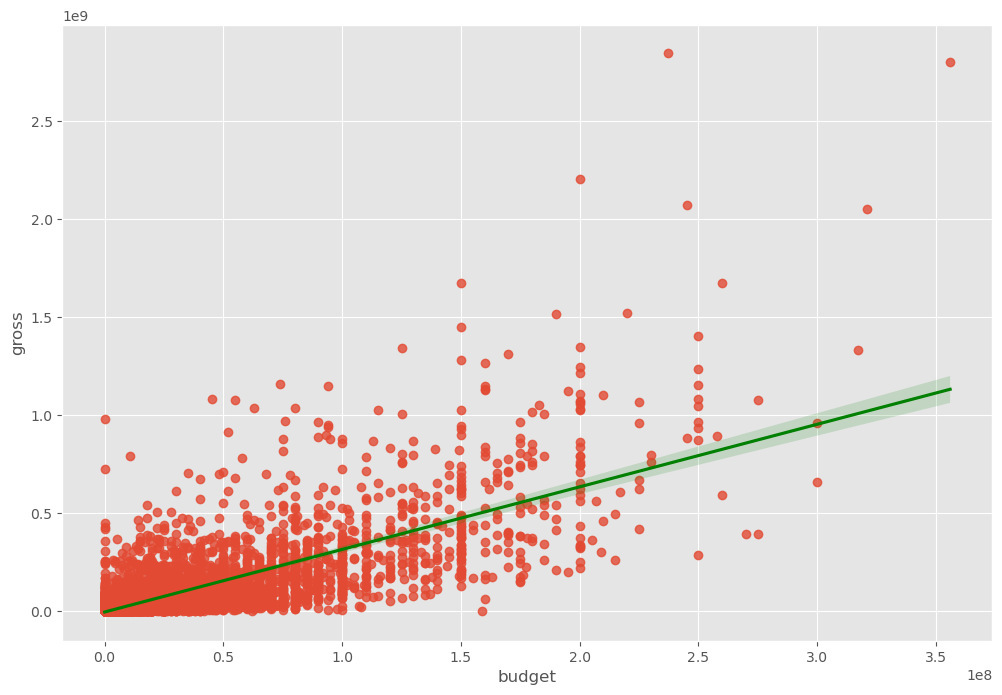

In [12]:
### Scatter plot using seaborn

sns.regplot(x='budget', y='gross', data = df, line_kws = {'color':'green'})

plt.show()

In [13]:
### Looking at correlation

correlation_df = df.corr(method = 'pearson', numeric_only = True)

correlation_df

### A high correlation between budget and gross

,year,score,votes,budget,gross,runtime
year,1.000000,0.091429,0.222427,0.309212,0.261900,0.116358
score,0.091429,1.000000,0.391952,0.053473,0.177451,0.379436
votes,0.222427,0.391952,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.053473,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.177451,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.379436,0.306984,0.268372,0.244339,1.000000


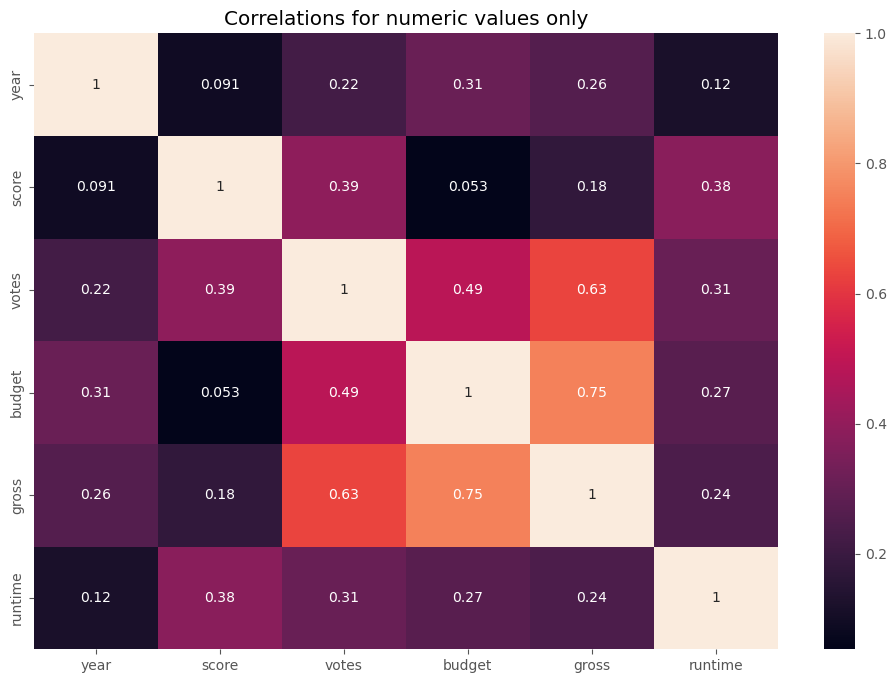

In [14]:
sns.heatmap(correlation_df, annot = True)

plt.title('Correlations for numeric values only')
plt.show()

In [15]:
### Looking at company

df_numerized = df

for col in df_numerized.columns:
    if(df_numerized[col].dtype == 'object'):
       df_numerized[col] = df_numerized[col].astype('category')
       df_numerized[col] = df_numerized[col].cat.codes
        
df_numerized.head() 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,610,7,1100000,1155,1778,2334,55,237000000,2847246203,2253,162
7445,535,5,0,2019,153,8,903000,162,743,2241,55,356000000,2797501328,1606,181
3045,6896,5,6,1997,616,7,1100000,1155,1778,1595,55,200000000,2201647264,2253,194
6663,5144,5,0,2015,612,7,876000,1125,2550,524,55,245000000,2069521700,1540,138
7244,536,5,0,2018,161,8,897000,162,743,2241,55,321000000,2048359754,1606,149


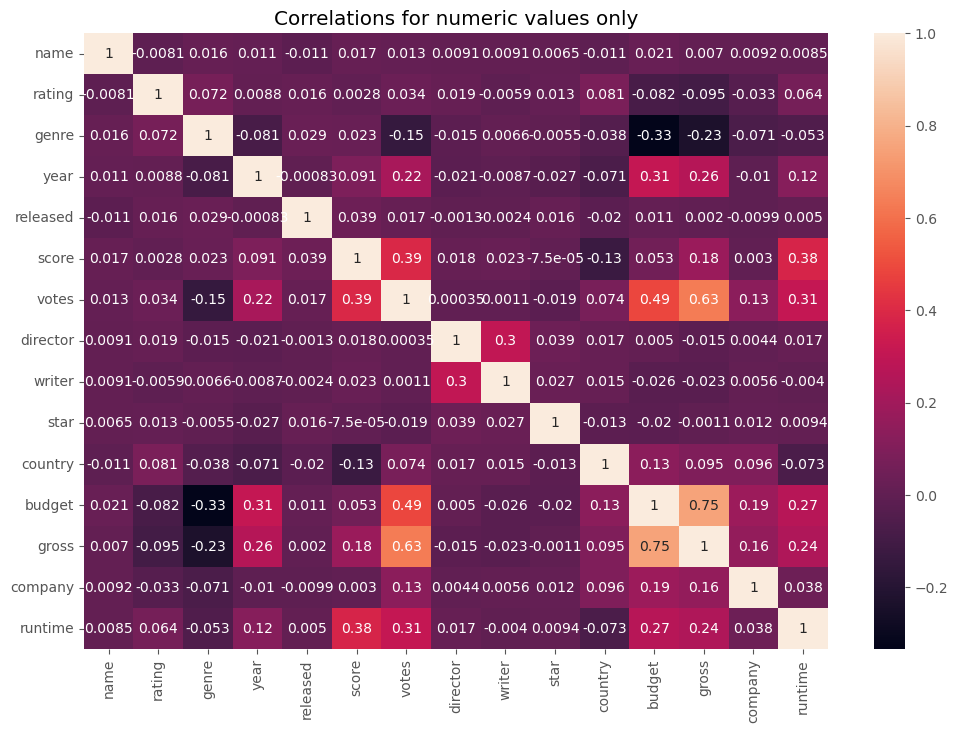

In [16]:
### Looking at correlation

correlation_df = df_numerized.corr(method = 'pearson', numeric_only = True)

sns.heatmap(correlation_df, annot = True)

plt.title('Correlations for numeric values only')
plt.show()

In [18]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs.head()

name  name        1.000000
      rating     -0.008069
      genre       0.016355
      year        0.011453
      released   -0.011223
dtype: float64

In [19]:
sorted_pairs = corr_pairs.sort_values()

high_corr = sorted_pairs[sorted_pairs > 0.5]

high_corr

votes     gross       0.632870
gross     votes       0.632870
          budget      0.750157
budget    gross       0.750157
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
### Company has lower correlations 